In [1]:
#Imports and Setup
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

In [2]:
# Comprehensive Nifty 50 Stocks List 
nifty50_tickers = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "ICICIBANK.NS", 
    "HINDUNILVR.NS", "SBIN.NS", "ITC.NS", "BHARTIARTL.NS", "KOTAKBANK.NS",
    "AXISBANK.NS", "BAJFINANCE.NS", "SUNPHARMA.NS", "BAJAJFINSV.NS", "ADANIPORTS.NS",
    "MARUTI.NS", "M&M.NS", "POWERGRID.NS", "NTPC.NS", "DRREDDY.NS",
    "CIPLA.NS", "COALINDIA.NS", "JSWSTEEL.NS", "TITAN.NS", 
    "ULTRACEMCO.NS", "LT.NS", "TECHM.NS", "NESTLEIND.NS", "GRASIM.NS",
    "ASIANPAINT.NS", "SHREECEM.NS", "UPL.NS", "BAJAJ-AUTO.NS", "AMBUJACEM.NS",
    "INDUSINDBK.NS", "BRITANNIA.NS", "DABUR.NS", "WIPRO.NS",
    "ZOMATO.NS", "PIDILITIND.NS", "DIVISLAB.NS", "CHOLAFIN.NS", "ADANIENT.NS",
    "TATACONSUM.NS", "ADANIGREEN.NS", "SAIL.NS", "GODREJCP.NS"
]


In [3]:
#Fetch Nifty 50 Data
# Fetch Nifty 50 data
Nifty50 = yf.download("^NSEI", start="2020-01-01", end="2025-01-01", progress=False)
Nifty50

YF.download() has changed argument auto_adjust default to True


Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2020-01-01  12182.500000  12222.200195  12165.299805  12202.150391  304100
2020-01-02  12282.200195  12289.900391  12195.250000  12198.549805  407700
2020-01-03  12226.650391  12265.599609  12191.349609  12261.099609  428800
2020-01-06  11993.049805  12179.099609  11974.200195  12170.599609  396500
2020-01-07  12052.950195  12152.150391  12005.349609  12079.099609  447800
...                  ...           ...           ...           ...     ...
2024-12-24  23727.650391  23867.650391  23685.150391  23769.099609  177700
2024-12-26  23750.199219  23854.500000  23653.599609  23775.800781  177700
2024-12-27  23813.400391  23938.849609  23800.599609  23801.400391  176800
2024-12-30  23644.900391  23915.349609  23599.300781  23796.900391  364900
2024-12-31  23644.800781  23689.849609  23460.449219  23560.599609  193600

[1237 rows x 5 columns]

In [4]:
close_price_nifty50 = Nifty50['Close'].dropna()

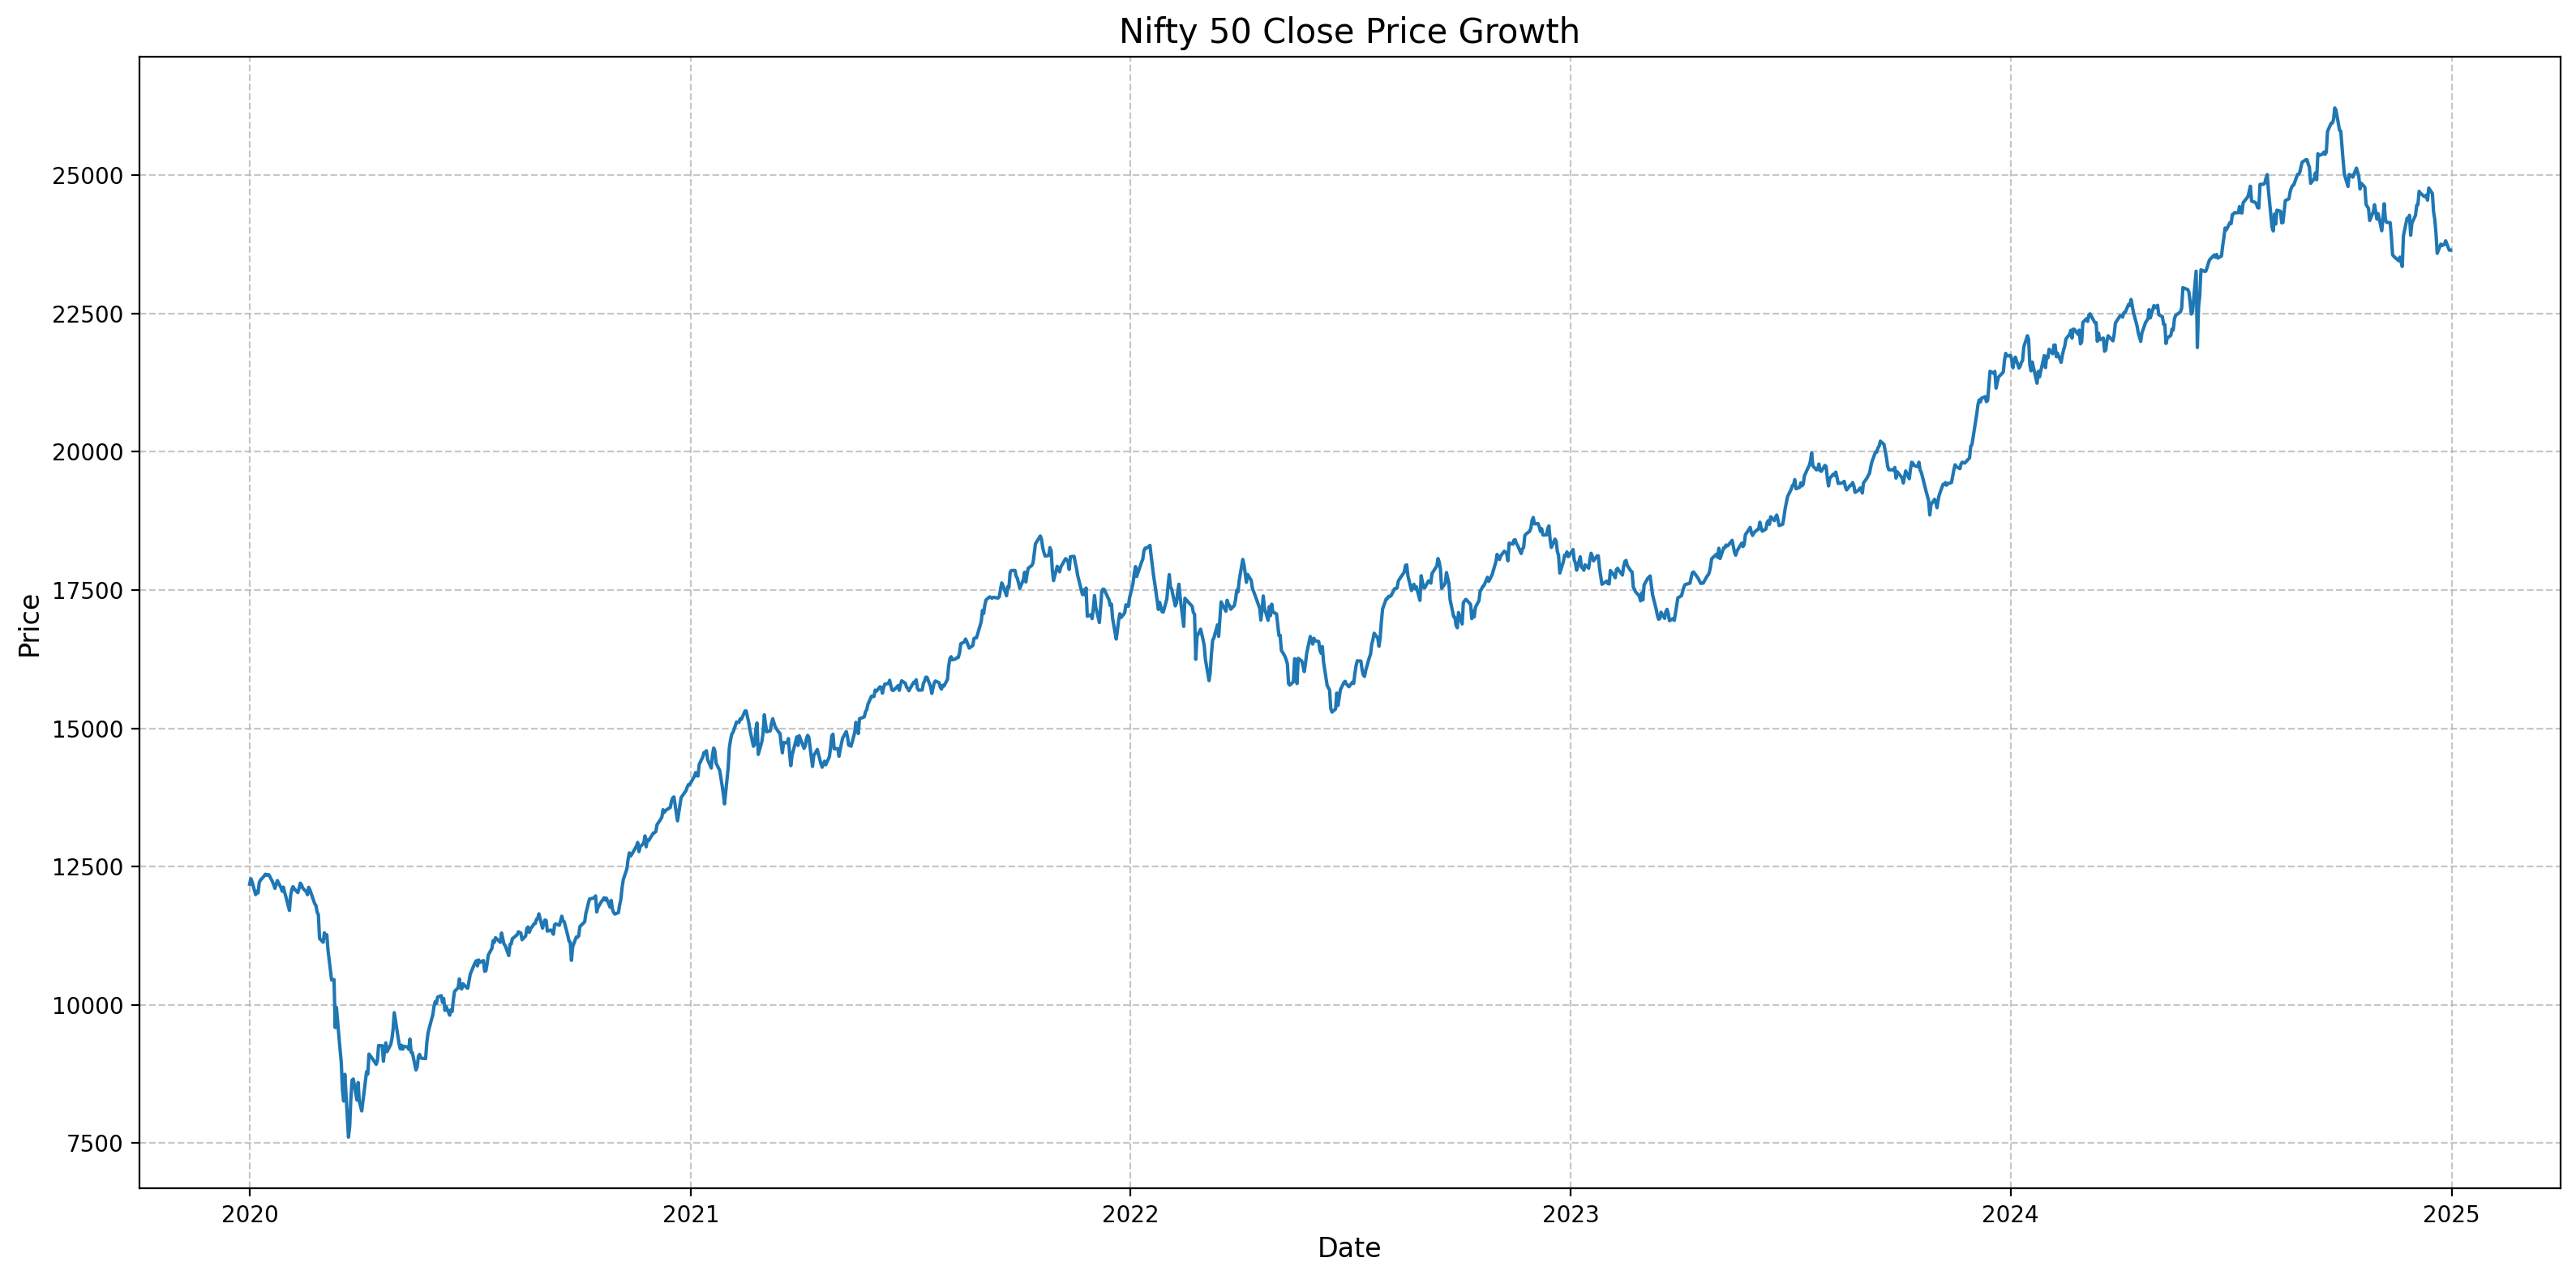

In [5]:
# 1. Close Price Growth Visualization
plt.figure(figsize=(16,8))
plt.plot(close_price_nifty50.index, close_price_nifty50.values)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Nifty 50 Close Price Growth', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:
# Cell 3: NiftyBlackLittermanModel Class
class NiftyBlackLittermanModel:
    def __init__(self, tickers, nifty_data):
        """
        Initialize the Black-Litterman Model for Nifty 50
        
        Parameters:
        - tickers: List of stock tickers
        - nifty_data: Nifty 50 index data
        """
        self.tickers = tickers
        self.nifty_data = nifty_data
        
        # Fetch individual stock data
        self.fetch_component_data()
        self.prepare_insights()
    
    def fetch_component_data(self):
        """
        Download historical stock prices for Nifty 50 components
        """
        successful_tickers = []
        successful_data = pd.DataFrame()
        
        for ticker in self.tickers:
            try:
                # Download data with error handling
                stock_data = yf.download(
                    ticker, 
                    start=self.nifty_data.index[0], 
                    end=self.nifty_data.index[-1], 
                    progress=False
                )['Close']
                
                # Check if data is not empty
                if not stock_data.empty:
                    successful_tickers.append(ticker)
                    successful_data[ticker] = stock_data
            except Exception as e:
                print(f"Error downloading {ticker}: {e}")
        
        # Update class attributes
        self.tickers = successful_tickers
        self.data = successful_data
        
        # Verify data
        if self.data.empty:
            raise ValueError("No valid stock data could be downloaded.")
    
    def prepare_insights(self):
        """
        Compute comprehensive statistical insights
        """
        # Calculate returns
        self.returns = np.log(self.data / self.data.shift(1)).dropna()
        
        # Compute statistical metrics
        self.returns_stats = self.compute_returns_statistics()
        
        # Correlation and Covariance
        self.correlation_matrix = self.returns.corr()
        self.covariance_matrix = self.returns.cov()
        
        # Visualization of Correlation Matrix
        plt.figure(figsize=(20, 16))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                    square=True, linewidths=0.5, cbar_kws={"shrink": .8})
        plt.title('Nifty 50 Stocks Correlation Heatmap', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # Risk-Return Analysis
        self.risk_return_analysis()
    
    def compute_returns_statistics(self):
        """
        Compute comprehensive returns statistics
        """
        # Daily returns statistics
        daily_stats = self.returns.describe().T
        
        # Annualized metrics (252 trading days)
        annual_stats = daily_stats.copy()
        annual_stats['mean'] *= 252  # Annualized return
        annual_stats['std'] *= np.sqrt(252)  # Annualized volatility
        
        return annual_stats
    
    def risk_return_analysis(self):
        """
        Visualize Risk-Return Relationship
        """
        # Scatter plot of Risk vs Return
        plt.figure(figsize=(16, 10))
        plt.scatter(
            self.returns_stats['std'], 
            self.returns_stats['mean'], 
            s=50
        )
        
        # Annotate each point
        for ticker in self.returns_stats.index:
            plt.annotate(
                ticker, 
                (self.returns_stats.loc[ticker, 'std'], 
                 self.returns_stats.loc[ticker, 'mean']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8
            )
        
        plt.title('Nifty 50 Components: Risk vs Return Analysis', fontsize=15)
        plt.xlabel('Annual Risk (Std Dev)', fontsize=12)
        plt.ylabel('Annual Return', fontsize=12)
        plt.tight_layout()
        plt.show()
    
    def black_litterman_returns(self, 
                                 risk_free_rate=0.02, 
                                 market_risk_premium=0.05, 
                                 tau=0.025):
        """
        Enhanced Black-Litterman Returns Calculation
        
        Incorporates correlation and risk insights
        """
        # Base equilibrium returns
        base_returns = self.returns_stats['mean']
        
        # Adjustment factors based on correlation and volatility
        correlation_adjustment = self.compute_correlation_adjustment()
        volatility_adjustment = self.compute_volatility_adjustment()
        
        # Combine adjustments
        adjusted_returns = base_returns * (1 + correlation_adjustment) * (1 - volatility_adjustment)
        
        # Visualization of Adjusted Returns
        plt.figure(figsize=(16, 8))
        plt.bar(self.tickers, adjusted_returns)
        plt.title('Black-Litterman Adjusted Returns', fontsize=15)
        plt.xlabel('Stocks', fontsize=12)
        plt.ylabel('Adjusted Annual Returns', fontsize=12)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
        
        return adjusted_returns
    
    def compute_correlation_adjustment(self):
        """
        Compute return adjustment based on inter-stock correlations
        """
        # Higher correlation reduces individual stock attractiveness
        correlation_penalty = np.mean(np.abs(self.correlation_matrix.values), axis=1)
        return -correlation_penalty
    
    def compute_volatility_adjustment(self):
        """
        Compute return adjustment based on stock volatility
        """
        # Stocks with higher volatility get penalized
        volatility_scores = self.returns_stats['std']
        return volatility_scores / volatility_scores.max()
    
    def optimize_portfolio(self, returns, cov_matrix, risk_free_rate=0.02):
        """
        Advanced Portfolio Optimization
        
        Incorporates correlation and risk insights
        """
        def portfolio_metrics(weights):
            """
            Compute comprehensive portfolio metrics
            """
            portfolio_return = np.sum(returns * weights)
            portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
            
            # Sharpe Ratio with additional penalty for high correlation
            sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
            
            return -sharpe_ratio
        
        # Constraints and bounds
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((0.01, 0.2) for _ in range(len(self.tickers)))  # 1-20% per stock
        
        # Initial equal weights
        initial_weights = np.ones(len(self.tickers)) / len(self.tickers)
        
        # Advanced optimization
        result = sco.minimize(
            portfolio_metrics, 
            initial_weights, 
            method='SLSQP', 
            bounds=bounds, 
            constraints=constraints
        )
        
        # Efficient Frontier Visualization
        self.visualize_efficient_frontier(returns, cov_matrix)
        
        return result.x
    
    def visualize_efficient_frontier(self, returns, cov_matrix):
        """
        Monte Carlo simulation for efficient frontier
        """
        num_portfolios = 10000
        results = np.zeros((3, num_portfolios))

        for i in range(num_portfolios):
            # Random weights
            weights = np.random.random(len(self.tickers))
            weights /= np.sum(weights)
            
            # Portfolio performance
            portfolio_return = np.sum(returns * weights)
            portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
            
            results[0,i] = portfolio_volatility
            results[1,i] = portfolio_return
            results[2,i] = portfolio_return / portfolio_volatility

        plt.figure(figsize=(16, 10))
        plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='viridis')
        plt.colorbar(label='Sharpe Ratio')
        plt.title('Efficient Frontier - Nifty 50 Stocks', fontsize=15)
        plt.xlabel('Portfolio Volatility', fontsize=12)
        plt.ylabel('Portfolio Return', fontsize=12)
        plt.tight_layout()
        plt.show()
    
    def detailed_analysis(self, n_top_stocks=10):
        """
        Comprehensive Portfolio Analysis
        """
        # Compute returns
        bl_returns = self.black_litterman_returns()
        
        # Optimize portfolio
        optimal_weights = self.optimize_portfolio(bl_returns, self.covariance_matrix)
        
        # Create detailed results DataFrame
        results_df = pd.DataFrame({
            'Ticker': self.tickers,
            'Weight': optimal_weights,
            'Expected Return': bl_returns,
            'Volatility': self.returns_stats['std'],
            'Correlation Penalty': self.compute_correlation_adjustment()
        })
        
        # Sort and display top stocks
        top_stocks = results_df.sort_values('Weight', ascending=False).head(n_top_stocks)
        
        # Print detailed results
        print("\nNifty 50 Comprehensive Black-Litterman Portfolio Optimization:")
        print("\nTop 10 Stocks Analysis:")
        print(top_stocks)
        
        print("\nPortfolio Metrics:")
        print(f"Portfolio Expected Return: {np.sum(top_stocks['Weight'] * top_stocks['Expected Return']):.4f}")
        print(f"Portfolio Volatility: {np.sqrt(np.dot(top_stocks['Weight'], np.dot(self.covariance_matrix.loc[top_stocks['Ticker'], top_stocks['Ticker']], top_stocks['Weight']))):.4f}")
        
        return top_stocks


In [7]:
# Cell 4: Main Execution
def main():
    # Create Black-Litterman Model instance
    bl_model = NiftyBlackLittermanModel(nifty50_tickers, Nifty50)
    
    # Run detailed analysis
    top_stocks = bl_model.detailed_analysis()
    
    return top_stocks

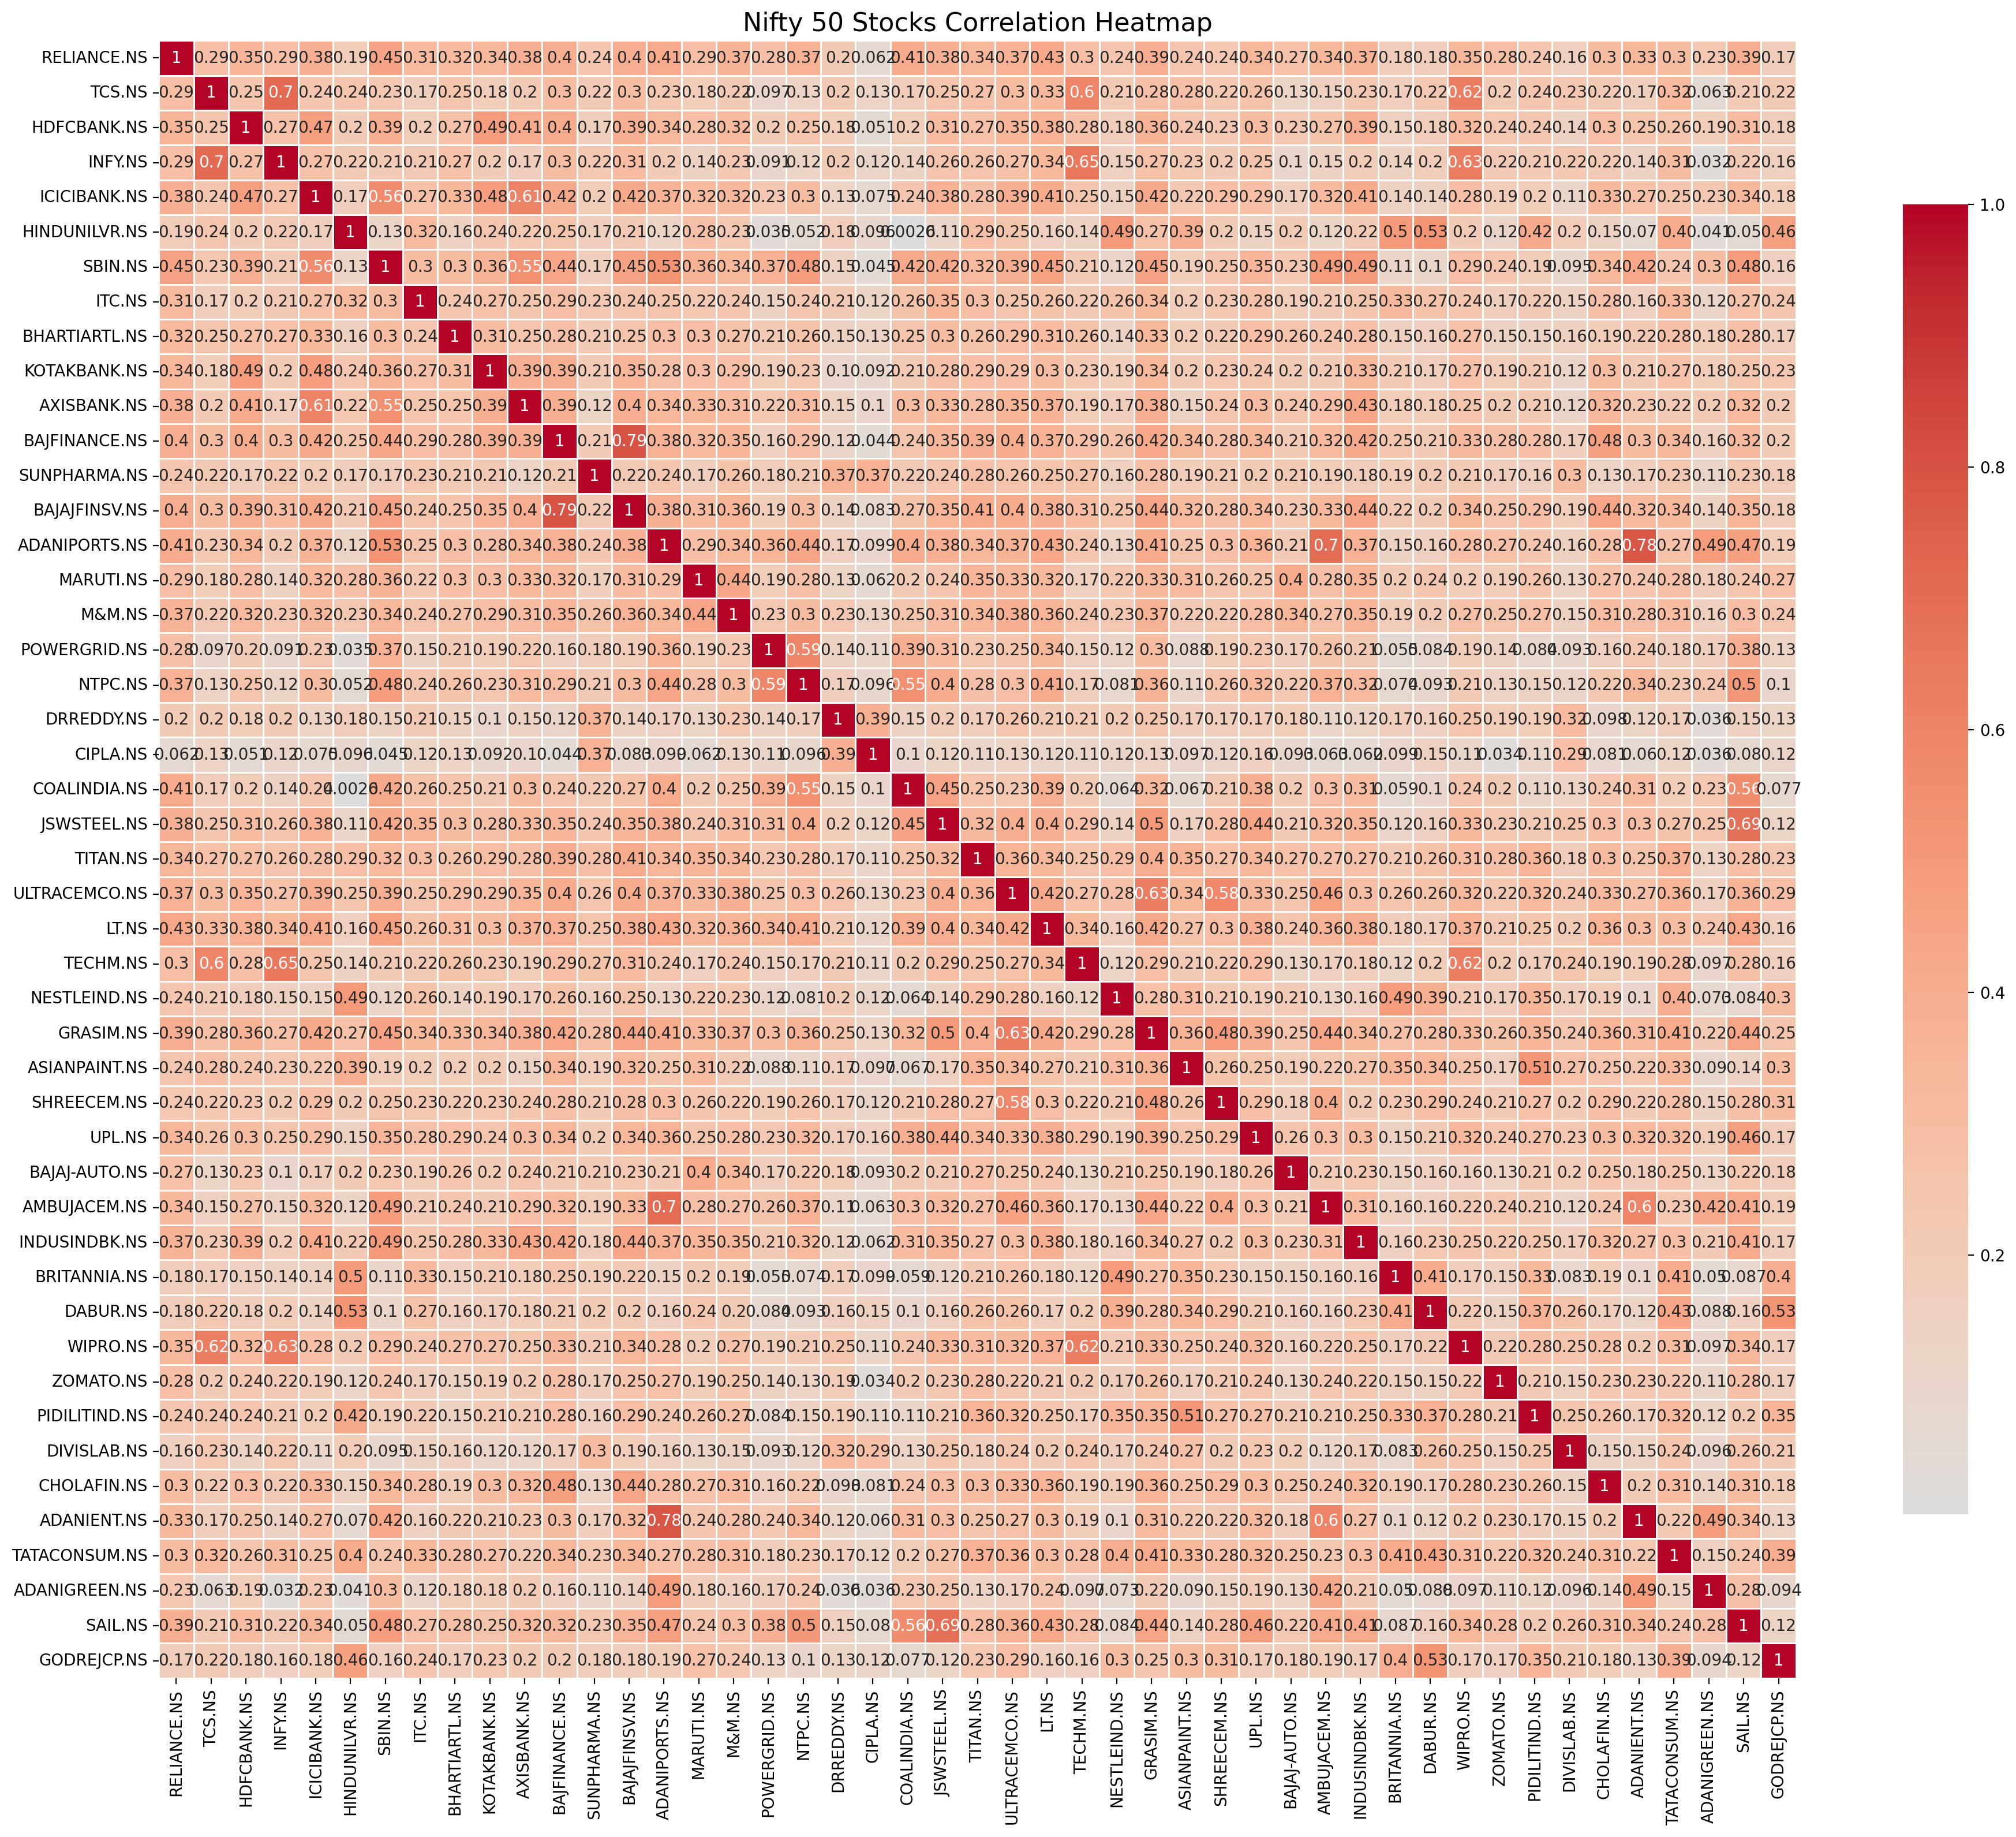

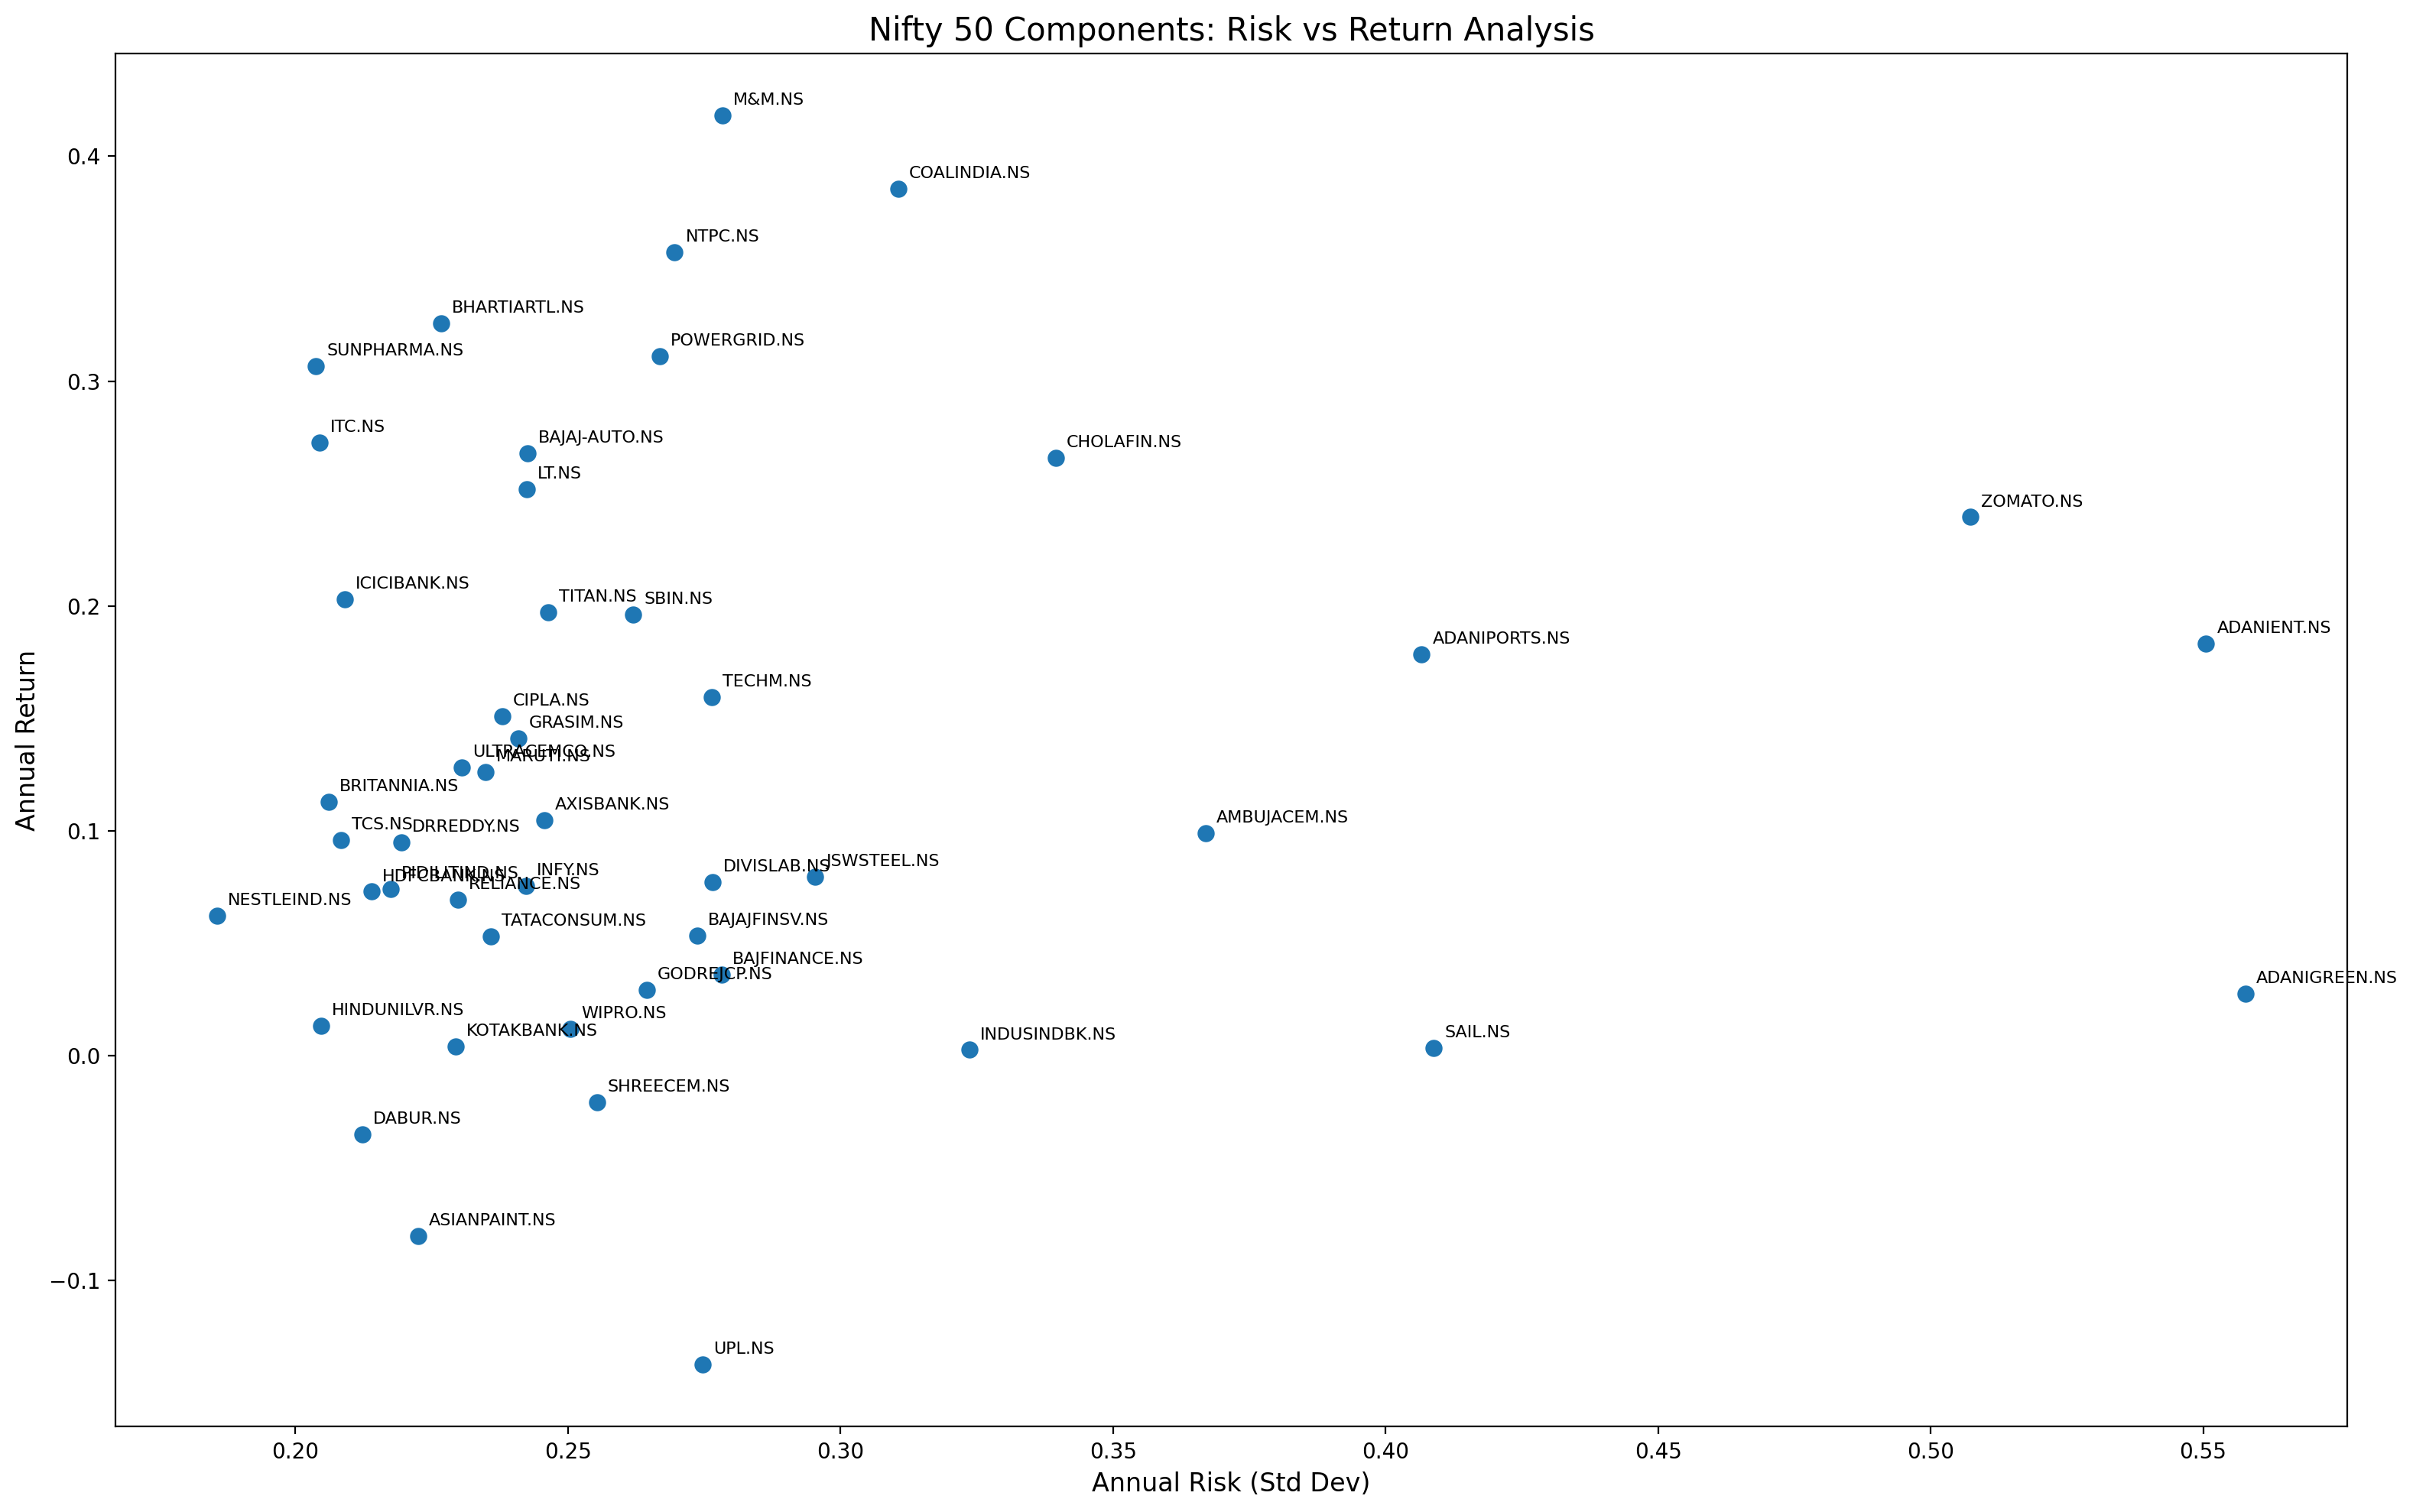

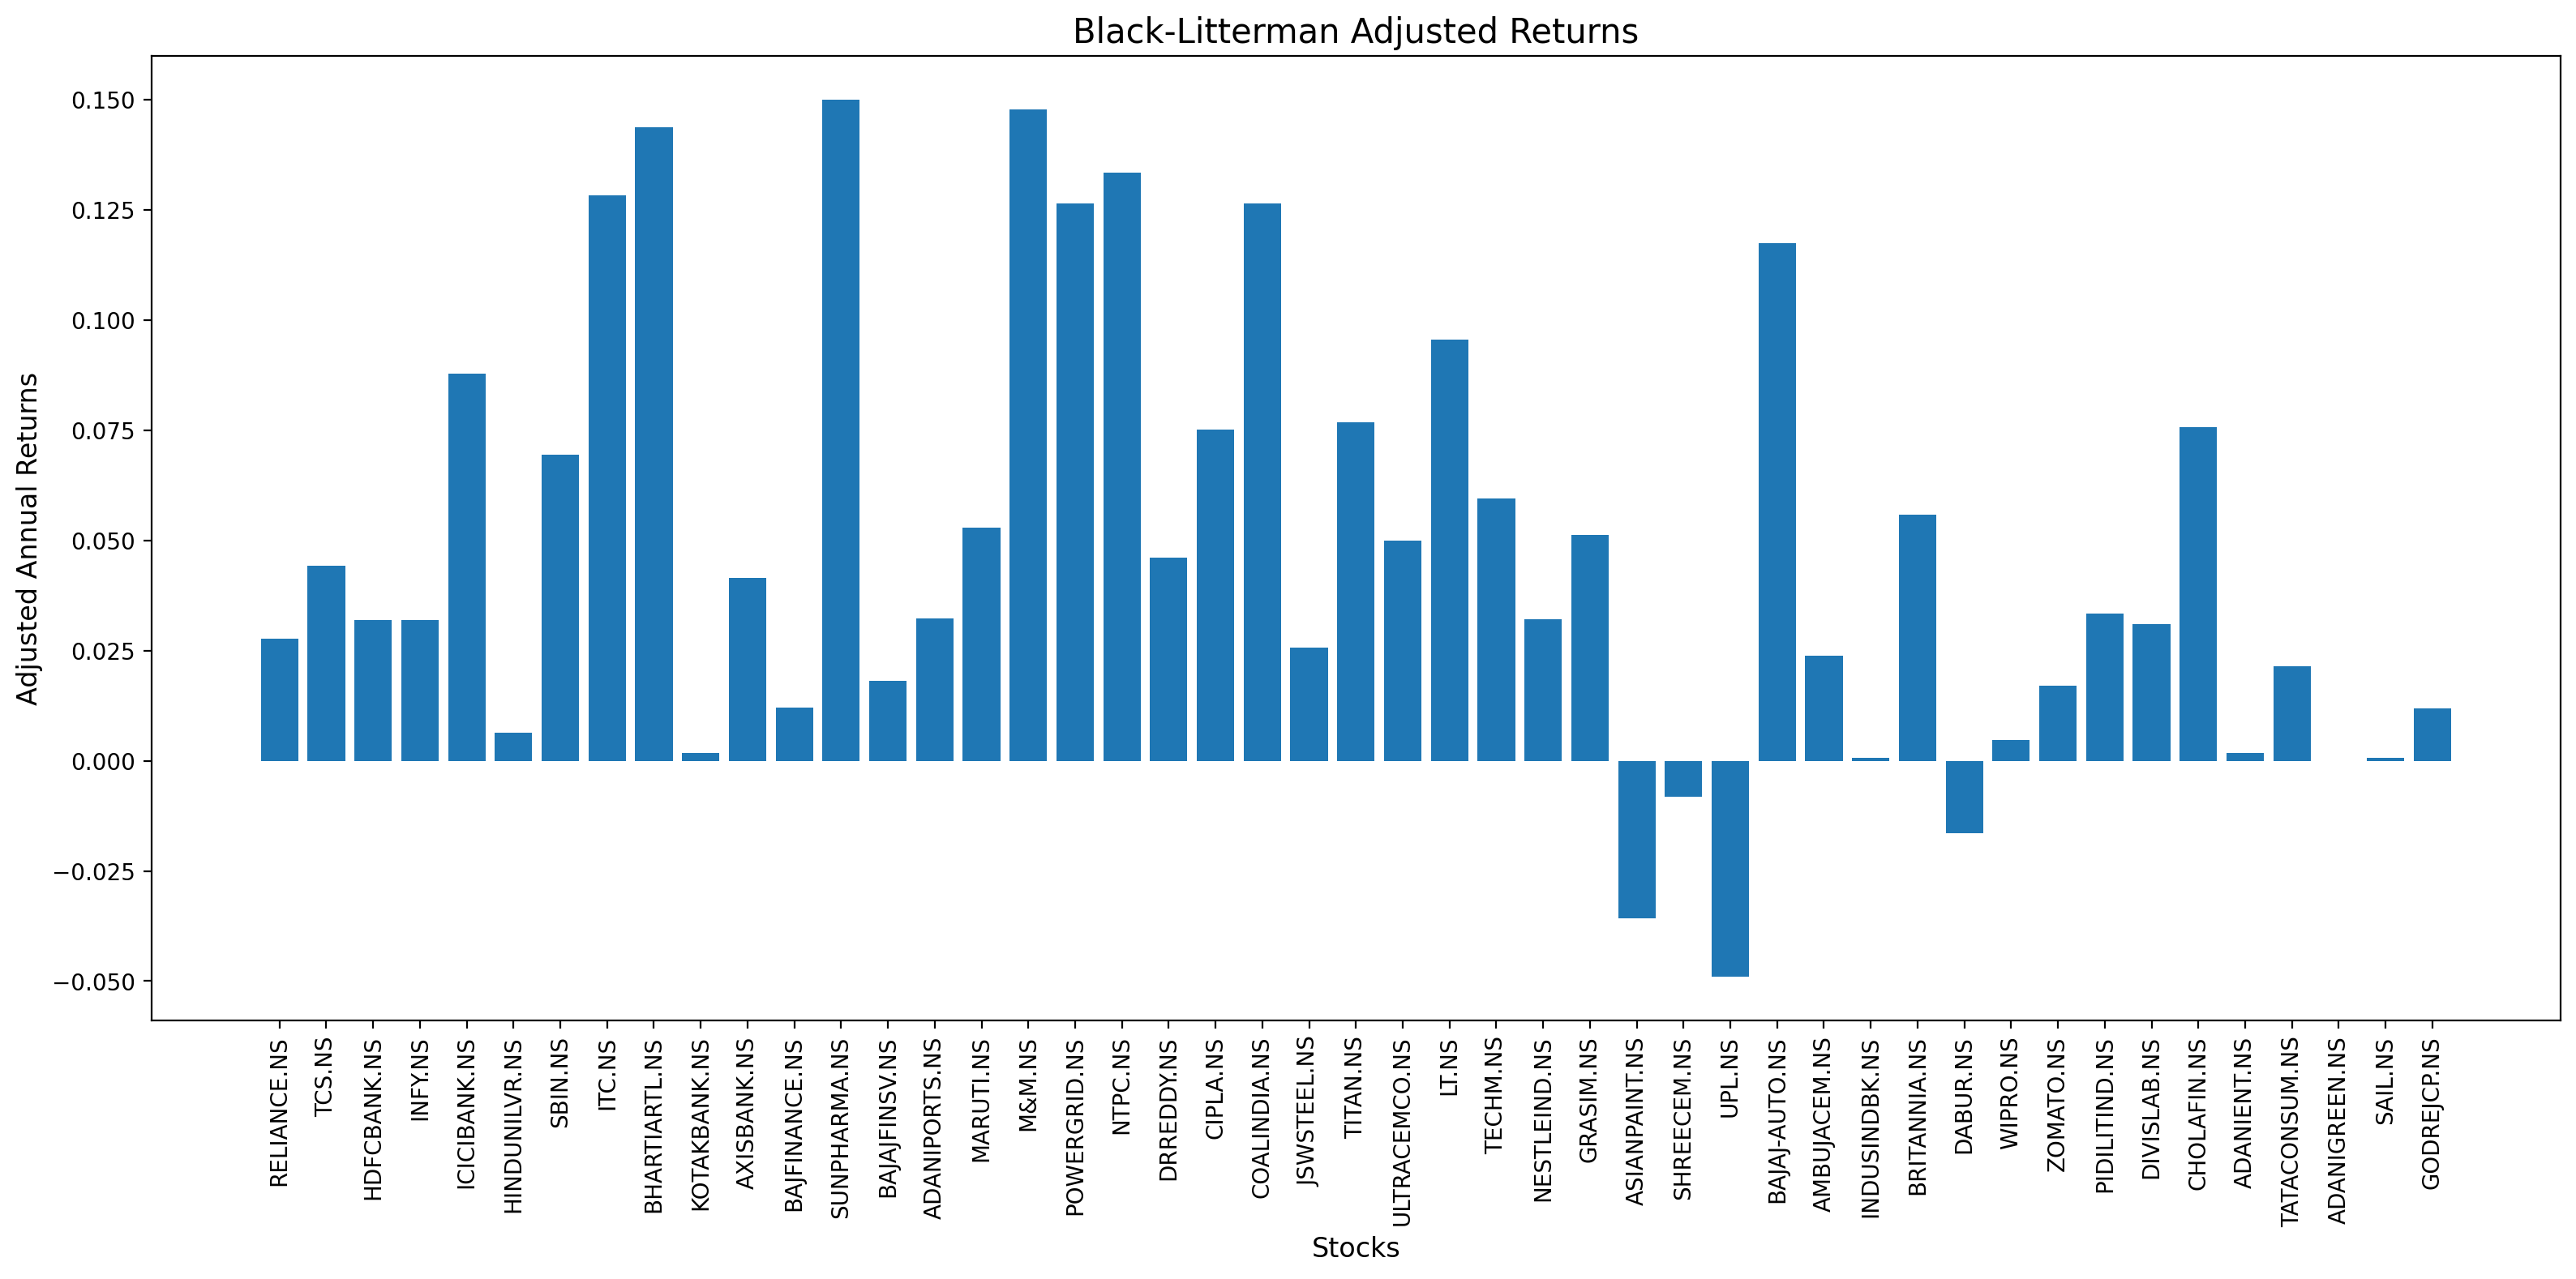

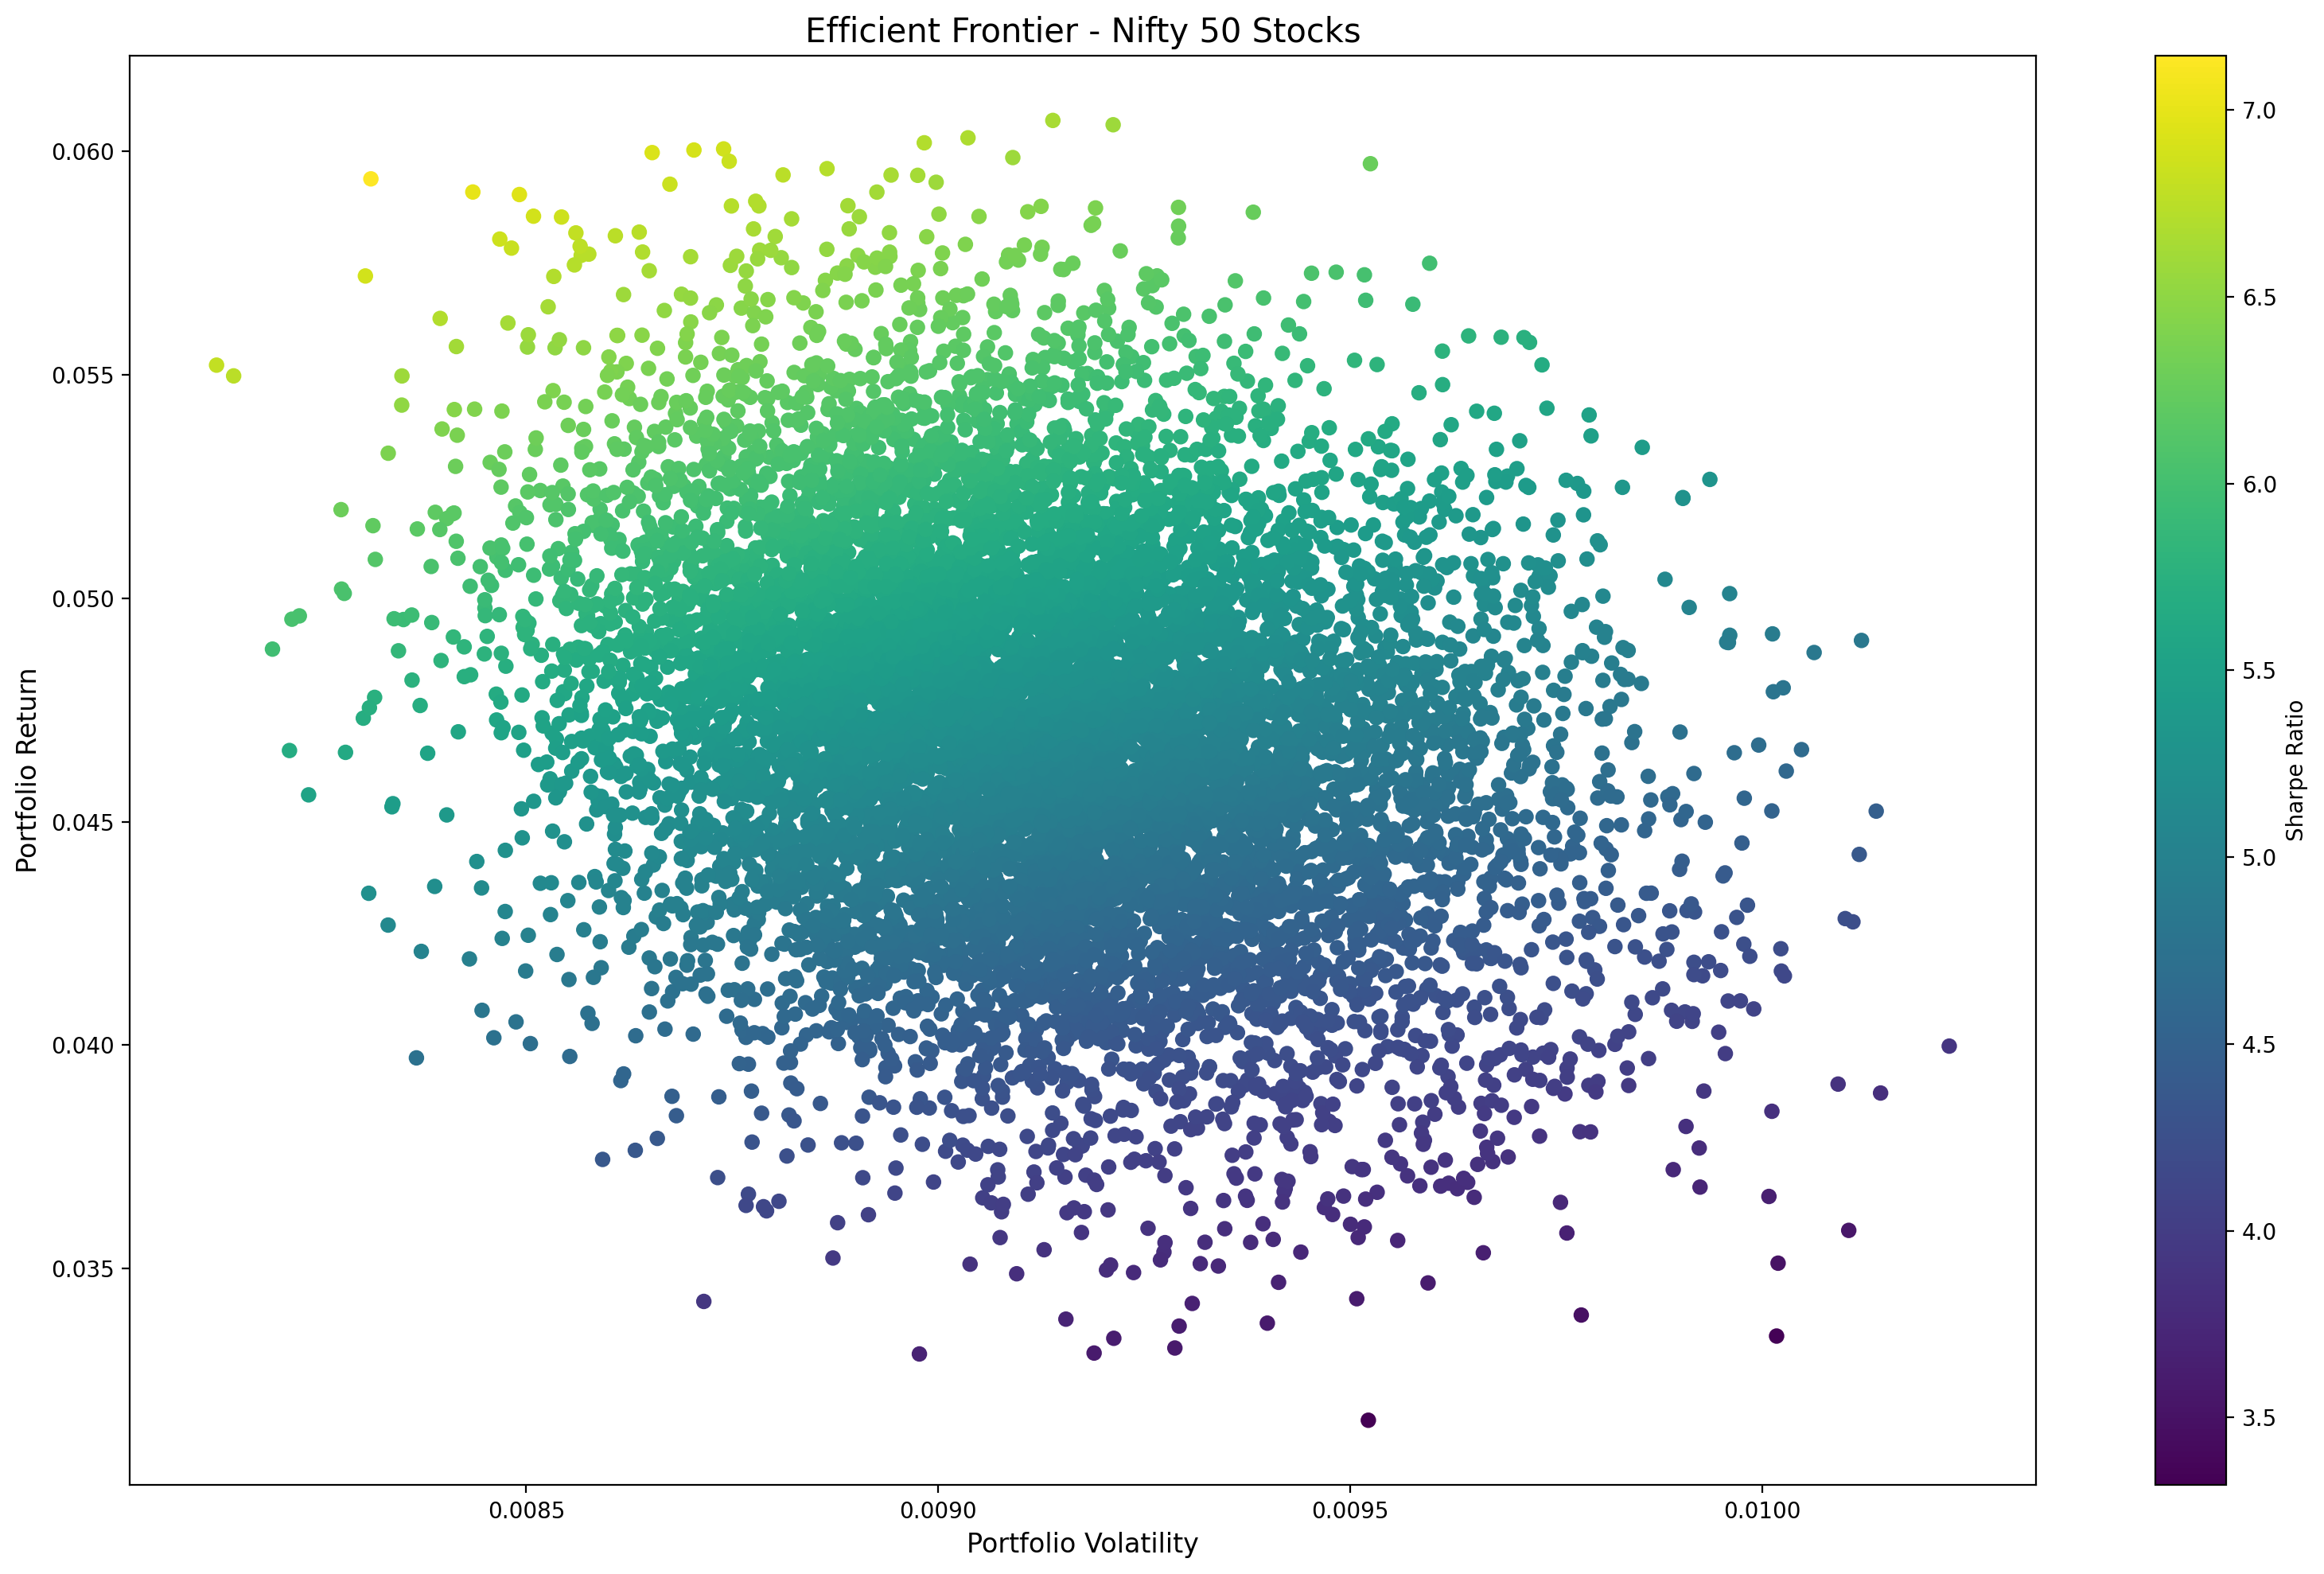


Nifty 50 Comprehensive Black-Litterman Portfolio Optimization:

Top 10 Stocks Analysis:
                      Ticker    Weight  Expected Return  Volatility  \
SUNPHARMA.NS    SUNPHARMA.NS  0.200000         0.149948    0.203794   
BHARTIARTL.NS  BHARTIARTL.NS  0.163963         0.143813    0.226801   
ITC.NS                ITC.NS  0.132482         0.128217    0.204430   
POWERGRID.NS    POWERGRID.NS  0.044353         0.126529    0.266837   
M&M.NS                M&M.NS  0.036288         0.147740    0.278366   
BAJAJ-AUTO.NS  BAJAJ-AUTO.NS  0.012914         0.117383    0.242605   
CIPLA.NS            CIPLA.NS  0.010000         0.075112    0.237958   
BRITANNIA.NS    BRITANNIA.NS  0.010000         0.055864    0.206174   
NESTLEIND.NS    NESTLEIND.NS  0.010000         0.032139    0.185629   
TCS.NS                TCS.NS  0.010000         0.044336    0.208442   

               Correlation Penalty  
SUNPHARMA.NS             -0.229804  
BHARTIARTL.NS            -0.255853  
ITC.NS            

In [8]:
# Cell 5: Run the Analysis
if __name__ == "__main__":
    main()